# 抗力係数

最後の100ステップのdrag Force Coefficientの平均: 2.3095957900000004


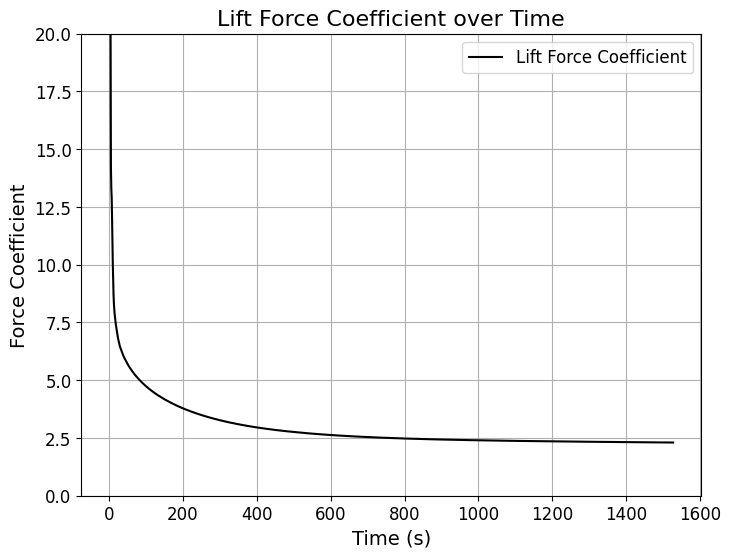

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# データの読み込み
dir_ = 0
df_dragForce = pd.read_table(f'./postProcessing/forces/{dir_}/coefficient.dat', skiprows=12)
df_dragForce = pd.DataFrame(df_dragForce)
columns_ = df_dragForce.columns

# グラフの作成
plt.figure(figsize=(8, 6))
plt.plot(df_dragForce[columns_[0]], df_dragForce[columns_[1]], label='Lift Force Coefficient', color="black")
plt.ylim([0, 20.0])
plt.grid()
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Force Coefficient", fontsize=14)
plt.title("Lift Force Coefficient over Time", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# グラフをPDFに保存
with PdfPages('drag_force_coefficient.pdf') as pdf:
    pdf.savefig()  # 現在のグラフをPDFに保存

# 最後の100ステップのデータの平均値を計算
df_last_100 = df_dragForce.tail(100)  # 最後の100行を抽出
mean_drag_force_last_100 = np.mean(df_last_100[columns_[1]])

# 平均値を出力
print(f"最後の100ステップのdrag Force Coefficientの平均: {mean_drag_force_last_100}")

# 揚力係数

データファイルが見つかりました。データを読み込みます。
15秒以降の平均Lift force Coefficient: 0.508724082432


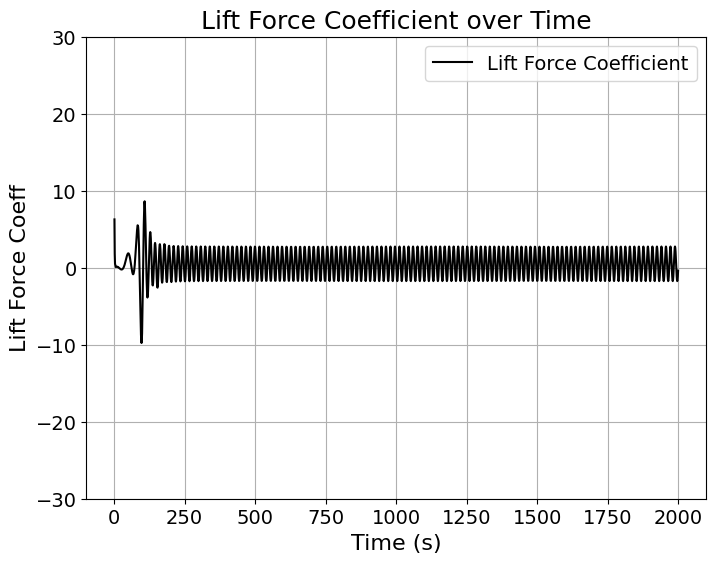

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# データファイルのパス
dir_ = 0
file_path = f'./postProcessing/forces/{dir_}/coefficient.dat'

# ファイルが存在するか確認
if os.path.exists(file_path):
    # ファイルが存在する場合は読み込み
    df_liftForce = pd.read_table(file_path, skiprows=12)
    print("データファイルが見つかりました。データを読み込みます。")
else:
    # ファイルが存在しない場合はダミーデータを作成
    print("データファイルが見つかりません。ダミーデータを使用します。")
    time = np.linspace(0, 30, 100)  # 0から30秒までの時間データ
    Cl = np.sin(time) * 10  # ダミーのLift force coefficient
    df_liftForce = pd.DataFrame({'Time': time, 'Cl': Cl})

# データが存在するかどうかで異なる処理を実行
if 'Time' in df_liftForce.columns:
    time = df_liftForce['Time']
    Cl = df_liftForce['Cl']
else:
    columns_ = df_liftForce.columns
    time = df_liftForce[columns_[0]]
    Cl = df_liftForce[columns_[3]]

# 15秒以降のデータのみをフィルタリング
time_filtered = time[time >= 0]
Cl_filtered = Cl[time >= 0]

# フィルタ後のグラフをプロット（フォント大きめ、線は黒色）
plt.figure(figsize=(8, 6))
plt.plot(time_filtered, Cl_filtered, color='black', label='Lift Force Coefficient')
plt.grid()
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Lift Force Coeff", fontsize=16)
plt.ylim([-30, 30])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Lift Force Coefficient over Time", fontsize=18)
plt.legend(fontsize=14)

# PDFに保存
with PdfPages('lift_force_coefficient_black_line.pdf') as pdf:
    pdf.savefig()

# 15秒以降の平均Lift force Coefficientを計算
mean_Cl_filtered = np.mean(Cl_filtered)
print(f"15秒以降の平均Lift force Coefficient: {mean_Cl_filtered}")

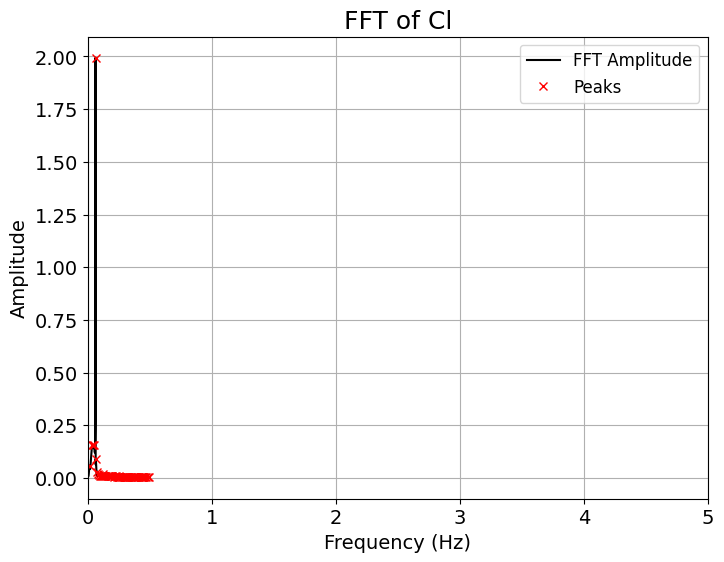

最大振幅を持つ周波数: 0.06 Hz
ストローハル数: 0.01 Hz


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from matplotlib.backends.backend_pdf import PdfPages

# 仮に time と Cl が既に定義されていると仮定

# 15秒以降のデータのみをフィルタリング
time_filtered = time[time >= 15]
Cl_filtered = Cl[time >= 15]

# 線形補間を実行
interp_func = interp1d(time, Cl, kind='linear')
new_time = np.linspace(time.iloc[0], time.iloc[-1], num=len(Cl))  # 新しい均等な時間軸
new_Cl = interp_func(new_time)

# FFTを計算
N = len(new_Cl)
dT = new_time[1] - new_time[0]  # サンプリング間隔
yf = np.fft.fft(new_Cl)
xf = np.fft.fftfreq(N, dT)

# FFTの結果をプロット
plt.figure(figsize=(8, 6))
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]), label='FFT Amplitude', color="black")  # 正の周波数成分のみ
plt.title('FFT of Cl', fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,5])
plt.grid()

# ピークを検出
peaks, _ = find_peaks(2.0/N * np.abs(yf[:N//2]), height=0)  # 高さの閾値を設定
peak_freqs = xf[peaks]  # ピークの周波数
peak_amplitudes = 2.0/N * np.abs(yf[peaks])  # ピークの振幅

# ピークをプロット
plt.plot(peak_freqs, peak_amplitudes, "x", color='red', label='Peaks')
plt.legend(fontsize=12)

# PDFに保存
with PdfPages('fft_peaks_cl.pdf') as pdf:
    pdf.savefig()

plt.show()

# ピークの振幅が最大の周波数を取得
max_peak_index = np.argmax(peak_amplitudes)  # 最大振幅のインデックス
max_peak_freq = peak_freqs[max_peak_index]  # 最大振幅の周波数

# 最大振幅の周波数を表示
print(f"最大振幅を持つ周波数: {max_peak_freq:.2f} Hz")

# ストローハル数の計算
d = 20 / 1000  # 円柱の直径
U = 0.15  # 流速
f = max_peak_freq  # ピーク周波数
St = f * d / U # ストローハル数

print(f"ストローハル数: {St:.2f} Hz")

# 残差

time :  2000.0 continuityError :  0.000872437841


,time,Local,Global,Cumulative
0,50.0,0.000198,0.000042,0.000042
1,100.0,0.001358,-0.000004,0.000038
2,150.0,0.000914,-0.000181,-0.000143
3,200.0,0.000906,-0.000178,-0.000321
4,250.0,0.000989,-0.000174,-0.000495


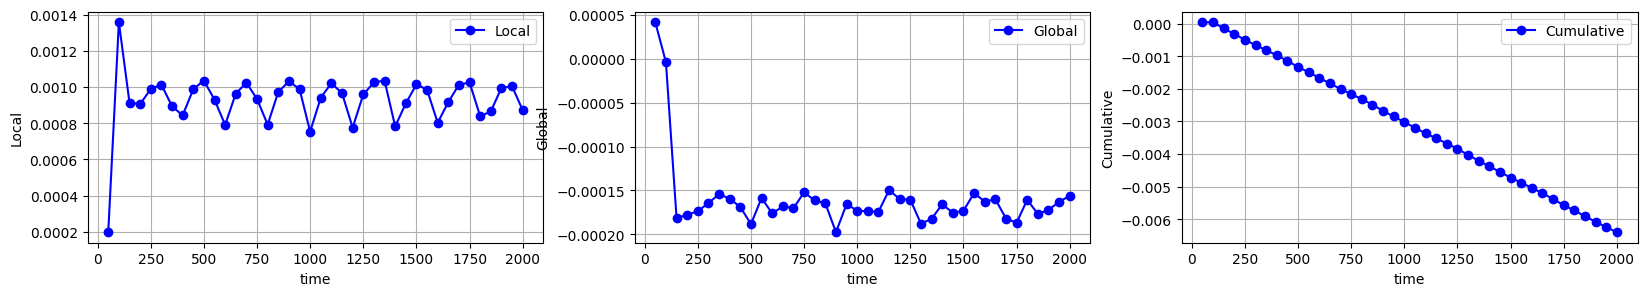

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def graph_func(df_continuityError, imin, imax, iposi,icol):
    plt.subplot(imin,imax,iposi)
    plt.plot(df_continuityError['time'],df_continuityError[icol],linestyle='solid',color='b',marker="o",label=icol)
    plt.xlabel('time')
    plt.ylabel(icol)
    plt.legend()
    plt.grid()
    plt.savefig("continuityError1.png")

def df_continuityError_func(dir_):
    data_continuityError = np.loadtxt(f'./postProcessing/continuityError1/{dir_}/continuityError.dat')
    df_continuityError = pd.DataFrame(data_continuityError, columns=['time','Local','Global','Cumulative'])  
    return df_continuityError

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_continuityError_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

dir_List = os.listdir('./postProcessing/continuityError1')
df_continuityError = df_concat(dir_List)

plt.figure(figsize=(20,3))
graph_func(df_continuityError, 1,3,1,'Local')
graph_func(df_continuityError, 1,3,2,'Global')
graph_func(df_continuityError, 1,3,3,'Cumulative')

print('time : ',df_continuityError['time'].iloc[-1], 'continuityError : ', df_continuityError['Local'].iloc[-1])

df_continuityError.head()

p_initial=1999    0.076441
Name: p_initial     , dtype: float64


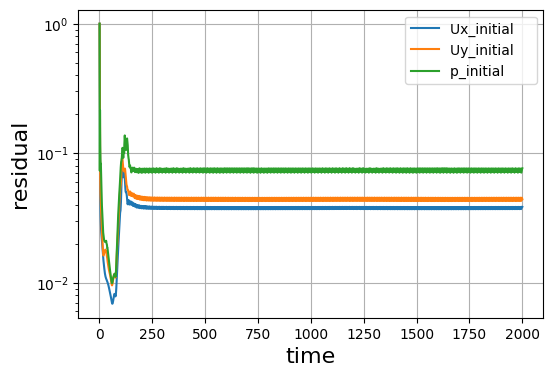

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


def graph_layout():
    plt.grid()
    plt.legend(loc='best',bbox_to_anchor=(1, 1))
    plt.yscale('log')
    plt.xlabel('time', fontsize=16)
    plt.ylabel('residual', fontsize=16)
    plt.savefig("solverInfo.png")

def df_residual_func(dir_):
    df_residual = pd.read_table(f'./postProcessing/solverInfo/{dir_}/solverInfo.dat',skiprows=1)
    df_residual = pd.DataFrame(df_residual)
    return df_residual

def df_concat(dir_List):
    df = pd.DataFrame()
    for dir_ in dir_List:
        try:
            df_ = df_residual_func(dir_)
            df = pd.concat([df, df_])
        except Exception:
            print("Empty")
        
    return df

dir_List = os.listdir('./postProcessing/solverInfo')
df_residual = df_concat(dir_List)

initial_residial = [data for data in df_residual.columns if "initial" in data]
final_residial = [data for data in df_residual.columns if "final" in data]
df_residual.plot(x="# Time        ",y=initial_residial, figsize=(6, 4))
graph_layout()
#df_residual.plot(x="# Time        ",y=final_residial)

print(f"p_initial={df_residual['p_initial     '][-1:]}")

# 圧力係数

C:\Users\kusum\AppData\Local\Temp\ipykernel_22552\1754151972.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)


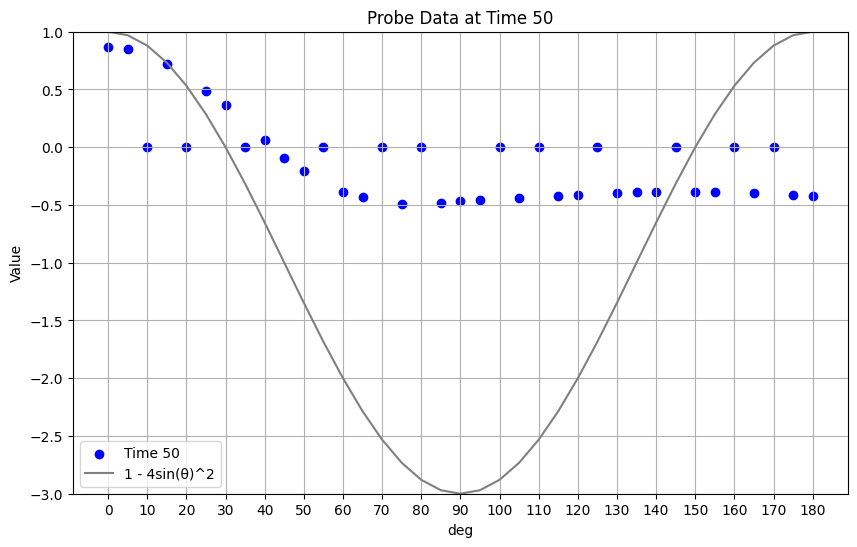

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ファイルパス
file_path = 'postProcessing/probes/0/p'

# データの読み込み
data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)

# プローブ番号
probes = np.arange(37)

# 時間50のデータを抽出
time_50 = data[data[0] == 1500].values.flatten()[1:]

# 無限大の値を0に置き換え
time_50 = np.where(time_50 == -1.000000e+300, 0, time_50)

# データの正規化
rho = 1.2
U = 0.15
time_50 = time_50 / (0.5 * rho * U**2)

# θの値を計算（プローブ番号を角度に変換）
theta = np.radians(probes * 5)

# 1 - 4sin(θ)^2の計算
sin_curve = 1 - 4 * np.sin(theta)**2

# プロットの作成
plt.figure(figsize=(10, 6))
plt.scatter(probes * 5, time_50, marker='o', color='b', label='Time 50')
plt.plot(probes * 5, sin_curve, linestyle='-', color='gray', label='1 - 4sin(θ)^2')

# グラフの装飾
plt.title('Probe Data at Time 50')
plt.xlabel('deg')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.ylim([-3, 1])
plt.xticks(np.arange(0, 185, 10))  # 横軸のメモリを10°ずつに設定
plt.show()

In [17]:
# 時間50のデータを抽出
time_50 = data[data[0] == 1000].values.flatten()[1:]
time_50

array([ 1.17385e-002,  1.15079e-002, -1.00000e+300,  9.75330e-003,
       -1.00000e+300,  6.57718e-003,  4.85702e-003, -1.00000e+300,
        7.43136e-004, -1.43865e-003, -3.00018e-003, -1.00000e+300,
       -5.53749e-003, -6.22624e-003, -1.00000e+300, -7.03575e-003,
       -1.00000e+300, -7.01023e-003, -6.84331e-003, -6.71144e-003,
       -1.00000e+300, -6.49473e-003, -1.00000e+300, -6.23696e-003,
       -6.09759e-003, -1.00000e+300, -5.82537e-003, -5.75249e-003,
       -5.69549e-003, -1.00000e+300, -5.65249e-003, -5.64526e-003,
       -1.00000e+300, -5.64060e-003, -1.00000e+300, -5.65472e-003,
       -5.67040e-003])